# Intro to Python and First law of Thermodynamics

In this tutorial we are going to go over some basic operations in Python that will guide you through the course and as an example we will use some of the thermodynamic concepts learned in class. <br>
This tutorial can be deployed in   <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Coding/answers/intro_thermo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# import numpy as matplotlib 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Thermodynamics recap

## First Law of Thermodynamics

The change in the internal energy (U) of a system is the sum of the heat (q) transferred to the system and the work (w) done on the system,
$$
dU = q + w
$$

## Heat
The energy that flows in between two objects that are at different temperatures. At constant pressure processes we can define heat as,
$$
dq_{p} = C_{P}dT,
$$
where $C_{P}$ is is the heat capacity of a substance at constant pressure, $C_{P} = mc_{p}$ where $m$ is the mass.

## P-V Work
Work in thermodynamics is defined as in classical mechanics, the energy transferred to a system by applying an external force along a displacement. 
In thermodynamics, one of the most common ways to do wok on a system is by changing the volume of the system through compression of expansion (P-V work).
P-V work is defined as,
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV
$$
where $P(T,V)$ is a function that describes the pressure of the system as a function of temperature (T) and its volume (V).
This type of integrals are known as **line integrals**. 



## Line integral
Let's compute the work done by a processes where the Pressure is given by,
$$
P(V) = \sin(V) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The initial and final volume for this processes are, $V_i = 10$ and $V_f=5$.


Text(0, 0.5, 'P')

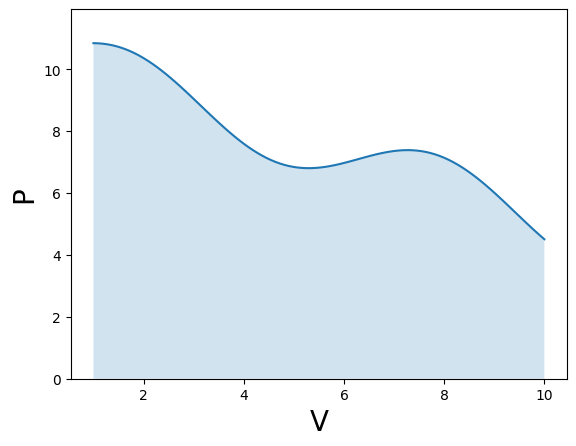

In [31]:
def f_P(V):
    a = -0.55
    b = 10.55
    p = np.sin(V) + a*V + b
    return p

vi = 1.
vf = 10

n = 100
v = np.linspace(vi, vf, n)
p = f_P(v)

# plotting
plt.plot(v, p)
plt.fill_between(v,p,alpha=0.2)
plt.ylim(0,np.max(p)+1.1)
plt.xlabel('V',fontsize=20)
plt.ylabel('P', fontsize=20)

What are the initial and final pressure? 

In [26]:
pi = f_P(vi)
pf = f_P(vf)

print('Initial pressure = ', f'{pi:.3f}')
print('Final pressure = ', f'{pf:.3f}')

Initial pressure =  9.456
Final pressure =  4.544


Using numerical integration, compute the value of the work for this process. <br>
The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) is one of the most common numerical integration strategies,
$$
\int_a^b f(x) dx \approx  \sum_{i=1}^N \frac{f(x_{i-1}) + f(x_{i})}{2} \Delta x  = \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
$$
where the partition of $[a,b]$ is $x_0 < x_1 < \cdots < x_N$ where $a = x_0$ and $b = x_N$. <br>
$\Delta x$ is the difference between two consecutive points, $\Delta x = x_{i+1} - x_i$.

If we expand the sum, we get,
$$
% \int_a^b f(x) dx \approx \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
\int_a^b f(x) dx \approx \frac{\Delta x}{2}\left ( f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + \cdots + f(x_N) \right )
$$


Let's consider 5 grid points $x_0 < x_1 < x_2 < x_3 < x_4$. <br>
How many terms does each term have? 

$$
\sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_0) + f(x_1) + f(x_2) + f(x_3)  \right)
$$
$$
\sum_{i=1}^N \frac{f(x_{i})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
if we sum both terms we get, 
$$
\int_a^b f(x) dx \approx  \frac{\Delta x}{2} \left(  f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)  \right)
$$

From the above equation, we can observe that except from the first ($x_0$) and last ($x_N$) term of the grid points, all other points are multiplied by a factor of 2.<br>

There are are many ways to code the above trapezoidal rule, 
1. For loops --> this tutorial.
2. Element wise vector multiplication --> suggested homework.

**Slicing in Python**
Slice syntax allows us to select a range of items in a list or Numpy array.<br>


In [27]:
x = np.arange(0, 10)
print(x)

# print second element
print(x[1])

# print last element
print(x[-1])

# print elements up to the third one
print(x[:2])

# print(x[::2])

# iterate x reverse order
print(x[::-1])

[0 1 2 3 4 5 6 7 8 9]
1
9
[0 1]
[9 8 7 6 5 4 3 2 1 0]


In [28]:
# code for trapezoidal rule
def trap_rule(y, dx):
    int_value = y[0]*(dx/2) + y[-1]*(dx/2)
    for yi in y[1:-1]:
        int_value += yi*dx
    return int_value

In [30]:
vi = 1. # initial volume
vf = 10 # final volume 
n = 500 # number of grid points
    
v = np.linspace(vi,vf, n) # grid of volume
dv = v[1] - v[0]
p = f_P(v) # value of pressure at each volume

w = trap_rule(p,dv)

print('N =  ', n)
print('DV = ', dv)
print('work = ', w)
                       

N =   500
DV =  0.018036072144288484
work =  67.55532242855152


Compute the true value of $P(T,V)$ for this process.
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV = -\int_{V_{i}}^{V_{f}} \left ( \sin(V) + a V + b \right ) dV 
$$
where $a = -0.55$ and $b = 10.55$.

<!-- w = -69.1044 -->

Using your code, how many grid points are required for numerical integration to approximate the true value  95%. <br>
The formula for mean percentage error (MPE) for a single point is,
$$
MPE =  \left| \frac{y - \hat{y}}{y} \right|100\%,
$$
where $\hat{y}$ is the true or exact value and $y$ is the predicted one.


In [16]:
# create a function for the MPE
def MPE(y,y_hat):
    e = (y - y_hat)/y_hat
    return np.abs(e) * 100

5 68.4666
6 68.7101
7 68.8355
8 68.9089
9 68.9557
10 68.9875
11 69.0100
12 69.0266
13 69.0391
14 69.0488
15 69.0565
16 69.0627
17 69.0678
18 69.0720
19 69.0755
20 69.0785
21 69.0810
22 69.0832
23 69.0851
24 69.0867
25 69.0882
26 69.0894
27 69.0906
28 69.0916
29 69.0925
30 69.0933
31 69.0940
32 69.0947
33 69.0953
34 69.0958
35 69.0963
36 69.0968
37 69.0972
38 69.0976
39 69.0979
40 69.0982
41 69.0985
42 69.0988
43 69.0991
44 69.0993
45 69.0996
46 69.0998
47 69.1000
48 69.1002
49 69.1003


Text(0, 0.5, '$y - \\hat{y}$')

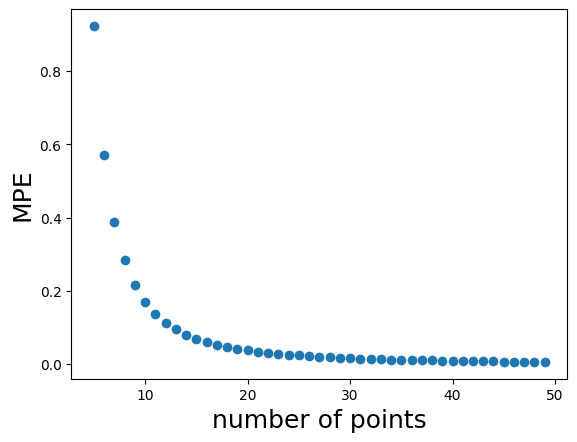

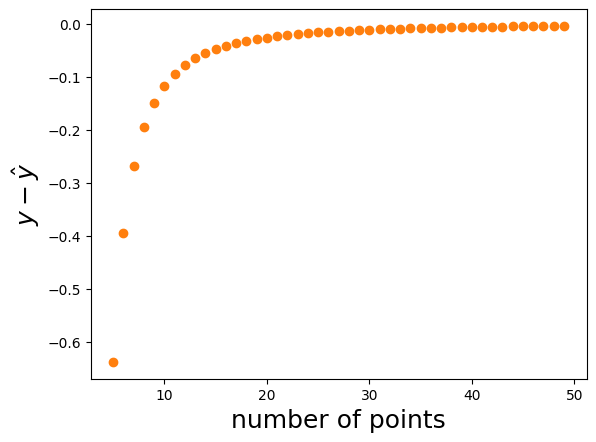

In [23]:
n_ = np.arange(5,50,1)

w_exact = 69.1044
mpe_ = [] # list to store the values
w_ = []
for n in n_:
    v = np.linspace(vi,vf, n) # grid of volume
    dv = v[1] - v[0]
    p = f_P(v) # value of pressure at each volume

    w = trap_rule(p,dv)
    w_.append(w)
    
    mpei = MPE(w,w_exact)
    mpe_.append(mpei)
    print(n, f'{w:.4f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# plot
plt.figure(0)
plt.scatter(n_,mpe_)
plt.xlabel('number of points',fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_ - w_exact,color='tab:orange')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$y - \hat{y}$', fontsize=18)
# plt.yscale('log')
    

Let's do the same analysis but now using, 
$$
P(V) = \sin \left (\frac{V}{0.1} \right ) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The integral of this function is, 
$$
\int_{1}^{10} P(V) dV = 67.5549
$$

Text(0, 0.5, 'P')

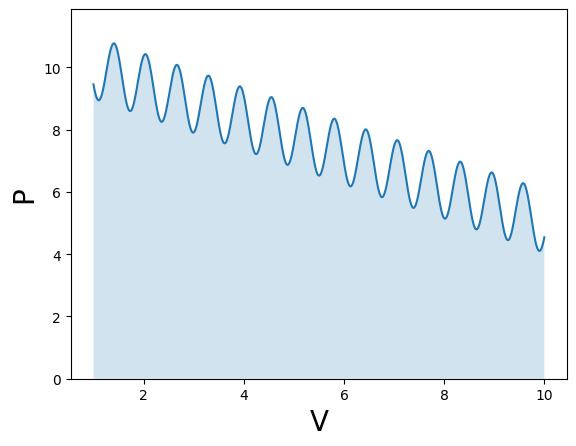

In [57]:
def f_P_new(V):
    a = -0.55
    b = 10.55
    p = np.sin(V/0.1) + a*V + b
    return p


vi = 1.
vf = 10

n = 1000
v = np.linspace(vi, vf, n)
p = f_P_new(v)

# plotting
plt.plot(v, p)
plt.fill_between(v, p, alpha=0.2)
plt.ylim(0, np.max(p)+1.1)
plt.xlabel('V', fontsize=20)
plt.ylabel('P', fontsize=20)

10 67.9766
11 67.5599
12 67.2265
13 66.8090
14 65.9475
15 60.2152
16 71.3057
17 69.1262
18 68.5602
19 68.2944
20 68.1379
21 68.0341
22 67.9597
23 67.9038
24 67.8602
25 67.8252
26 67.7964
27 67.7725
28 67.7523
29 67.7349
30 67.7200
31 67.7069
32 67.6954
33 67.6853
34 67.6762
35 67.6682
36 67.6609
37 67.6543
38 67.6484
39 67.6430
40 67.6380
41 67.6335
42 67.6294
43 67.6256
44 67.6220
45 67.6188
46 67.6158
47 67.6129
48 67.6103
49 67.6079


Text(0, 0.5, '$y - \\hat{y}$')

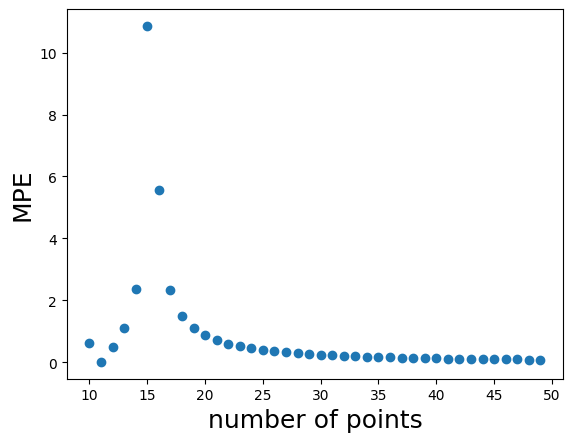

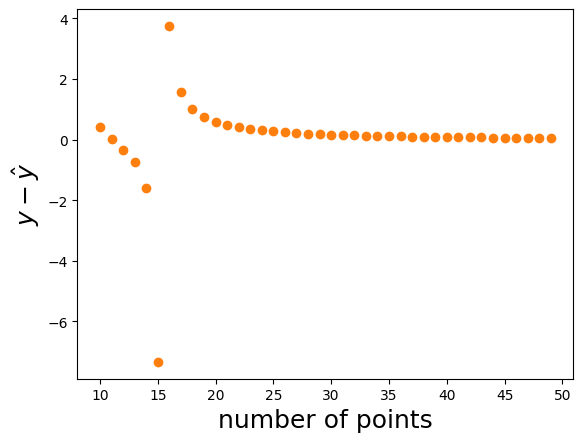

In [60]:
n_ = np.arange(10, 50, 1)

w_exact = 67.5549
mpe_ = []  # list to store the values
w_ = []
for n in n_:
    v = np.linspace(vi, vf, n)  # grid of volume
    dv = v[1] - v[0]
    p = f_P_new(v)  # value of pressure at each volume

    w = trap_rule(p, dv)
    w_.append(w)    

    mpei = MPE(w, w_exact)
    mpe_.append(mpei)
    print(n, f'{w:.4f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# plot
plt.figure(0)
plt.scatter(n_, mpe_)
plt.xlabel('number of points', fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_ - w_exact, color='tab:orange')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$y - \hat{y}$', fontsize=18)
# plt.yscale('log')

# Heat Capacity
the heat capacity $C_{P}$ of a substance is the amount of heat absorbed by the system to increase its temperature 1C. <br>

Experimentally one can measure the $C_{P}$ of a substance using a calorimeter for example, where we can measure the temperature and the amount of heat transferred to the substance. <br>
We can approximate the computation of $C_{P}$ as, 
$$
C_{P} = \frac{q}{\Delta T}
$$


The following experimental data contains the measured amount of heat (q) to change 1 kg of an unknown material from the initial temperature ($T_i$) to a final one ($T_f$). <br>

| heat (kJ)   | $T_i$ (C) | $T_f$ (C) |
| -------- | ------- | ------- |
| 9.08 | 21.5 | 31.38 |
| 10.52 | 40.4 | 51.93 |
| 10.27 | 60.36 | 71.44 |
| 7.6 | 81.75 | 90.1 |
| 8.1 | 101.97 | 110.84 |
| 8.38 | 121.32 | 130.31 |
| 9.07 | 141.07 | 150.75 |

**Exercise** <br>
1. Compute the mean and the standard deviation of the $C_{P}$ using this experimental data.

Tips:
1. [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
2. [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [ ]:
ti_and_tf = np.array([[21.5 , 31.38],
                      [40.4 , 51.93],
                      [60.36 , 71.44],
                      [81.75 , 90.1],
                      [101.97 , 110.84],
                      [121.32 , 130.31],
                      [141.07 , 150.75]])

dT = ti_and_tf[:, 1] - ti_and_tf[:,0]
q = np.array([9.08, 10.52, 10.27, 7.6, 8.1, 8.38, 9.07])
cp = q/dT
print(cp)

av_cp = np.mean(cp)
std_cp = np.std(cp)
print('mean Cp = ', av_cp)
print('std CP = ', std_cp)